<a href="https://colab.research.google.com/github/sylviawanjiku/Gender-Based-Discrimination-NLP/blob/main/NLP_GBV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read Data

In [14]:
import pandas as pd
import re

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
from gensim.utils import simple_preprocess

# NLTK
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

maindf = pd.read_csv('gbv-harmful-trafficking (1).csv', error_bad_lines=False)

# have a look
display(maindf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       27227 non-null  int64  
 1   Unnamed: 0.1     27227 non-null  object 
 2   id               27227 non-null  object 
 3   conversation_id  27227 non-null  object 
 4   created_at       27227 non-null  object 
 5   date             27227 non-null  object 
 6   time             27227 non-null  object 
 7   timezone         27227 non-null  int64  
 8   user_id          27227 non-null  int64  
 9   username         27227 non-null  object 
 10  name             27227 non-null  object 
 11  place            18 non-null     object 
 12  tweet            27227 non-null  object 
 13  language         27223 non-null  object 
 14  mentions         27225 non-null  object 
 15  urls             27223 non-null  object 
 16  photos           27223 non-null  object 
 17  replies_coun

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,11,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


None

In [15]:
maindf.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,27227.0,5.428300e+03,3.534190e+03,0.0,2268.5,5.108000e+03,8.511000e+03,1.218400e+04
timezone,27227.0,3.672825e-05,6.060383e-03,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
user_id,27227.0,5.852844e+17,5.853095e+17,0.0,407639516.0,7.438940e+17,1.207406e+18,1.388346e+18
replies_count,27223.0,9.691437e-01,1.080265e+01,0.0,0.0,0.000000e+00,1.000000e+00,1.166000e+03
retweets_count,27223.0,3.645704e+00,9.222338e+01,0.0,0.0,0.000000e+00,0.000000e+00,1.366500e+04
likes_count,27223.0,1.582801e+01,5.826047e+02,0.0,0.0,1.000000e+00,3.000000e+00,9.222100e+04
video,27223.0,1.342247e-01,3.408999e-01,0.0,0.0,0.000000e+00,0.000000e+00,1.000000e+00
near,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       27227 non-null  int64  
 1   Unnamed: 0.1     27227 non-null  object 
 2   id               27227 non-null  object 
 3   conversation_id  27227 non-null  object 
 4   created_at       27227 non-null  object 
 5   date             27227 non-null  object 
 6   time             27227 non-null  object 
 7   timezone         27227 non-null  int64  
 8   user_id          27227 non-null  int64  
 9   username         27227 non-null  object 
 10  name             27227 non-null  object 
 11  place            18 non-null     object 
 12  tweet            27227 non-null  object 
 13  language         27223 non-null  object 
 14  mentions         27225 non-null  object 
 15  urls             27223 non-null  object 
 16  photos           27223 non-null  object 
 17  replies_coun

# General Descriptive Summary

In [17]:
# DROP DUPLICATES
maindf.drop_duplicates(subset=['tweet'], keep='first',inplace=True)
maindf.shape

(24532, 38)

In [18]:
count = maindf['tweet'].str.split().str.len()
count.index =count.index.astype(str)+ ' words:'
count.sort_index(inplace=True)

In [19]:
print('Total number of words:', count.sum(), 'words')

Total number of words: 859685 words


In [20]:
print('Mean number of words per tweet:',round(count.mean(),2), 'words')

Mean number of words per tweet: 35.04 words


In [21]:
maindf['tweet_length'] =maindf['tweet'].str.len()
print('Total length of the dataset:',maindf['tweet_length'].sum(), 'words')

Total length of the dataset: 5450568 words


In [22]:
print('Mean length of a tweet is:',round(maindf.tweet_length.mean(),0), 'characters')
maindf = maindf.drop('tweet_length',axis=1)

Mean length of a tweet is: 222.0 characters


# Text Processing

### Drop Columns

In [23]:
# drop columns I don't need
drop_list = ['Unnamed: 0','Unnamed: 0.1','id','conversation_id','created_at','name','timezone','user_id','cashtags','place','quote_url','near','geo','source','user_rt_id','user_rt','retweet_id','retweet_date','translate','trans_src','trans_dest','video','retweet','thumbnail']
df = maindf.drop(columns=drop_list)

# have a look
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24532 entries, 0 to 27226
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            24532 non-null  object 
 1   time            24532 non-null  object 
 2   username        24532 non-null  object 
 3   tweet           24532 non-null  object 
 4   language        24529 non-null  object 
 5   mentions        24530 non-null  object 
 6   urls            24529 non-null  object 
 7   photos          24529 non-null  object 
 8   replies_count   24529 non-null  float64
 9   retweets_count  24529 non-null  float64
 10  likes_count     24529 non-null  float64
 11  hashtags        24529 non-null  object 
 12  link            24530 non-null  object 
 13  reply_to        24529 non-null  object 
dtypes: float64(3), object(11)
memory usage: 2.8+ MB


None

In [24]:
#convert tweet to string
df['tweet'] = df['tweet'].apply(str)

In [25]:
#Remove @user
def remove_users(tweet,pattern1,pattern2):
  r = re.findall(pattern1, tweet)
  for i in r:
      tweet = re.sub(i, '', tweet)

  r = re.findall(pattern2, tweet)
  for i in r:
      tweet = re.sub(i, '', tweet)
  return tweet
  

In [26]:
import numpy as np
import re

df['tidy_tweet'] = np.vectorize(remove_users)(df['tweet'],"@[\w]*", "@[\w]*")

In [27]:
df.head()

,date,time,username,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,reply_to,tidy_tweet
0,2021-02-14,23:59:20,mikecoulson48,Join the Fight against Forced Child Marriage ...,en,[],['https://www.freedomunited.org/advocate/stand...,[],0.0,8.0,1.0,[],https://twitter.com/mikecoulson48/status/13611...,[],Join the Fight against Forced Child Marriage ...
1,2021-02-14,23:56:57,bretto1997,@RealCandaceO Work on your marriage! Every da...,en,[],[],[],0.0,0.0,1.0,[],https://twitter.com/bretto1997/status/13611021...,"[{'screen_name': 'RealCandaceO', 'name': 'Cand...",Work on your marriage! Every day! It's not ...
2,2021-02-14,23:52:27,rachedennis,@sheilagregoire “Disruptive” child. Everything...,en,[],[],[],0.0,0.0,0.0,[],https://twitter.com/rachedennis/status/1361101...,"[{'screen_name': 'sheilagregoire', 'name': 'Sh...",“Disruptive” child. Everything was so crazy a...
3,2021-02-14,23:46:22,hommiesdrey,@cuppymusic Make una no dey whine my nipples. ...,en,[],[],[],0.0,0.0,1.0,[],https://twitter.com/HommiesDrey/status/1361099...,"[{'screen_name': 'cuppymusic', 'name': 'Cuppy'...",Make una no dey whine my nipples. There is ab...
4,2021-02-14,23:44:31,kathy65483441,"@CNN That's fine if the company so chooses, bu...",en,[],[],[],0.0,0.0,0.0,[],https://twitter.com/Kathy65483441/status/13610...,"[{'screen_name': 'CNN', 'name': 'CNN', 'id': '...","That's fine if the company so chooses, but it..."


In [28]:
df['tidy_tweet'].head()

0    Join the Fight against Forced Child Marriage  ...
1     Work on your marriage!  Every day!  It's not ...
2     “Disruptive” child. Everything was so crazy a...
3     Make una no dey whine my nipples. There is ab...
4     That's fine if the company so chooses, but it...
Name: tidy_tweet, dtype: object

In [29]:
# NORMALIZATION - converts all tweets into lowercase
df['tidy_tweet'] = df['tidy_tweet'].str.lower()

#Visualizations (EDA)

In [30]:
# Check the above link for other installation instructions
!pip3 install sweetviz

# importing sweetviz
import sweetviz as sv

     |████████████████████████████████| 15.1MB 183kB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [31]:
viewdf = df.drop(columns=['date','time'])

# #to analyze the data and create a report, simply call analyze() method passing in the dataframe as argument
gbv_report = sv.analyze(viewdf)

# #display the report as html
gbv_report.show_html('gbv.html')

                                             |          | [  0%]   00:00 -> (? left)

Report gbv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Hashtag Plot

In [32]:
#get all hashtags
df['hashtags'] = df['tidy_tweet'].apply(lambda twt : re.findall(r"# (\w+)", twt))

In [33]:
from collections import Counter

d = Counter(df.hashtags.sum())
df_hashtags = pd.DataFrame([d]).T

In [34]:
df_hashtags.columns = ['freq']
df_hashtags.freq.sum()

20

In [35]:
df_hashtags.sort_values(by=['freq'], ascending=False, inplace=True)

In [36]:
df_hashtags.head(20)

,freq
of,3
finally,2
to,2
national,2
about,1
paedophilia,1
2,1
say,1
1,1
like,1


In [37]:
# We drop 'sex' and 'trafficking' hashtags as these were the searching filters
df_hashtags = df_hashtags.drop(df_hashtags[df_hashtags.index.values=='trafficking'].index)
df_hashtags = df_hashtags.drop(df_hashtags[df_hashtags.index.values=='sex'].index)

Among 53.939 Tweets, 15557 Hashtags were used.


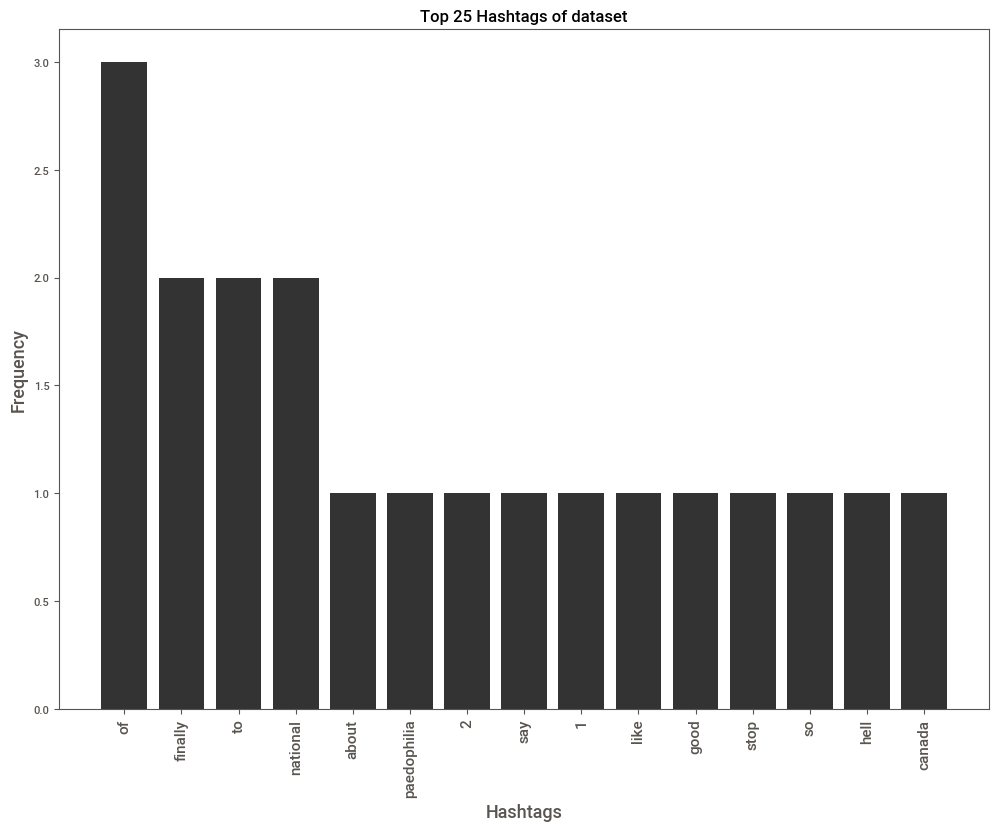

In [38]:
# Visualization of Top 25 Hashtags
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

labels = df_hashtags.head(25).index.values.tolist()
freq = df_hashtags['freq'].head(25).values.tolist()
index = np.arange(len(freq))

print("Among 53.939 Tweets, 15557 Hashtags were used.")
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Hashtags', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, labels, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Hashtags of dataset', fontsize=12, fontweight="bold")
plt.show()

Remove hashtags,urls,punctuations and short words

In [39]:
# REMOVE HASHTAGS
def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

In [40]:
df['tidy_tweet'] = np.vectorize(remove_hashtags)(df['tidy_tweet'], "# [\w]*", "#[\w]*")

In [41]:
# REMOVE LINKS
def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

In [42]:
df['tidy_tweet'] = np.vectorize(remove_links)(df['tidy_tweet'])

In [43]:
# REMOVE Punctuations, Numbers, and Special Characters
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [44]:
# REMOVE SHORT WORDS
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))


In [45]:
# TOKENIZATION
# Tokenization. It is the process where the text is split according to whitespaces,
#  and every word and punctuation is saved as a separate token.
def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  
df['tidy_tweet_tokens'] = list(tokenize(df['tidy_tweet']))


Remove stopwords

In [46]:
# Prepare Stop Words
import nltk 
nltk.download('stopwords')

stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'twitter', 'tweet','twitt','marriage','child','trafficking'])
# REMOVE STOPWORDS
def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet)) if word    not in stop_words] for tweet in tweets]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
df['tokens_no_stop'] = remove_stopwords(df['tidy_tweet_tokens'])

Drop rows having less than three tokens

In [48]:
# REMOVE TWEETS LESS THAN 3 TOKENS
df['length'] = df['tokens_no_stop'].apply(len)
df = df.drop(df[df['length']<3].index)

In [49]:
df = df.drop(['length'], axis=1)
df.shape

(23966, 17)

In [50]:
df.reset_index(drop=True, inplace=True)

In [51]:
df['tidy_tweet'].head(5)

0             join fight against forced child marriage
1    work your marriage every always going well lov...
2    disruptive child everything crazy school churc...
3    make whine nipples there absolutely nothing sw...
4    that fine company chooses shame grew with aunt...
Name: tidy_tweet, dtype: object

Wordcloud

In [52]:
# Join the tweet back together
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

In [53]:
df['no_stop_joined'] = df.apply(rejoin_words, axis=1)

In [54]:
df.head()

,date,time,username,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,reply_to,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined
0,2021-02-14,23:59:20,mikecoulson48,Join the Fight against Forced Child Marriage ...,en,[],['https://www.freedomunited.org/advocate/stand...,[],0.0,8.0,1.0,[],https://twitter.com/mikecoulson48/status/13611...,[],join fight against forced child marriage,"[join, fight, against, forced, child, marriage]","[join, fight, forced]",join fight forced
1,2021-02-14,23:56:57,bretto1997,@RealCandaceO Work on your marriage! Every da...,en,[],[],[],0.0,0.0,1.0,[],https://twitter.com/bretto1997/status/13611021...,"[{'screen_name': 'RealCandaceO', 'name': 'Cand...",work your marriage every always going well lov...,"[work, your, marriage, every, always, going, w...","[work, every, always, going, well, love, beaut...",work every always going well love beautiful li...
2,2021-02-14,23:52:27,rachedennis,@sheilagregoire “Disruptive” child. Everything...,en,[],[],[],0.0,0.0,0.0,[],https://twitter.com/rachedennis/status/1361101...,"[{'screen_name': 'sheilagregoire', 'name': 'Sh...",disruptive child everything crazy school churc...,"[disruptive, child, everything, crazy, school,...","[disruptive, everything, crazy, school, church...",disruptive everything crazy school church turn...
3,2021-02-14,23:46:22,hommiesdrey,@cuppymusic Make una no dey whine my nipples. ...,en,[],[],[],0.0,0.0,1.0,[],https://twitter.com/HommiesDrey/status/1361099...,"[{'screen_name': 'cuppymusic', 'name': 'Cuppy'...",make whine nipples there absolutely nothing sw...,"[make, whine, nipples, there, absolutely, noth...","[make, whine, nipples, absolutely, nothing, sw...",make whine nipples absolutely nothing sweet ch...
4,2021-02-14,23:44:31,kathy65483441,"@CNN That's fine if the company so chooses, bu...",en,[],[],[],0.0,0.0,0.0,[],https://twitter.com/Kathy65483441/status/13610...,"[{'screen_name': 'CNN', 'name': 'CNN', 'id': '...",that fine company chooses shame grew with aunt...,"[that, fine, company, chooses, shame, grew, wi...","[fine, company, chooses, shame, grew, aunt, je...",fine company chooses shame grew aunt jemima pr...


In [55]:
all_words = ' '.join([text for text in df['no_stop_joined']])

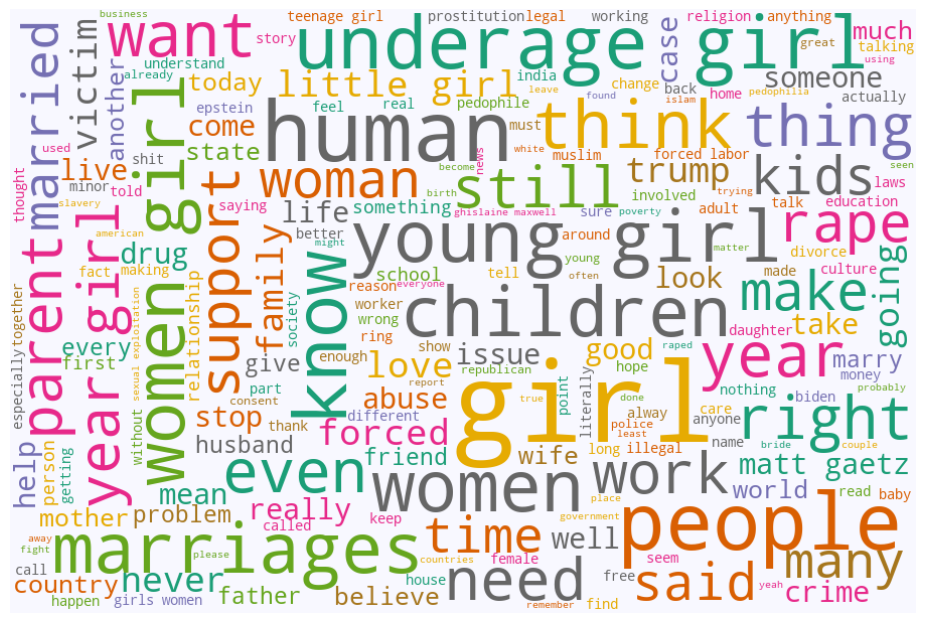

In [56]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=200,colormap='Dark2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [57]:
word_freq = pd.Series(np.concatenate([x.split() for x in df.no_stop_joined])).value_counts()

In [58]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

Unique words: 27026


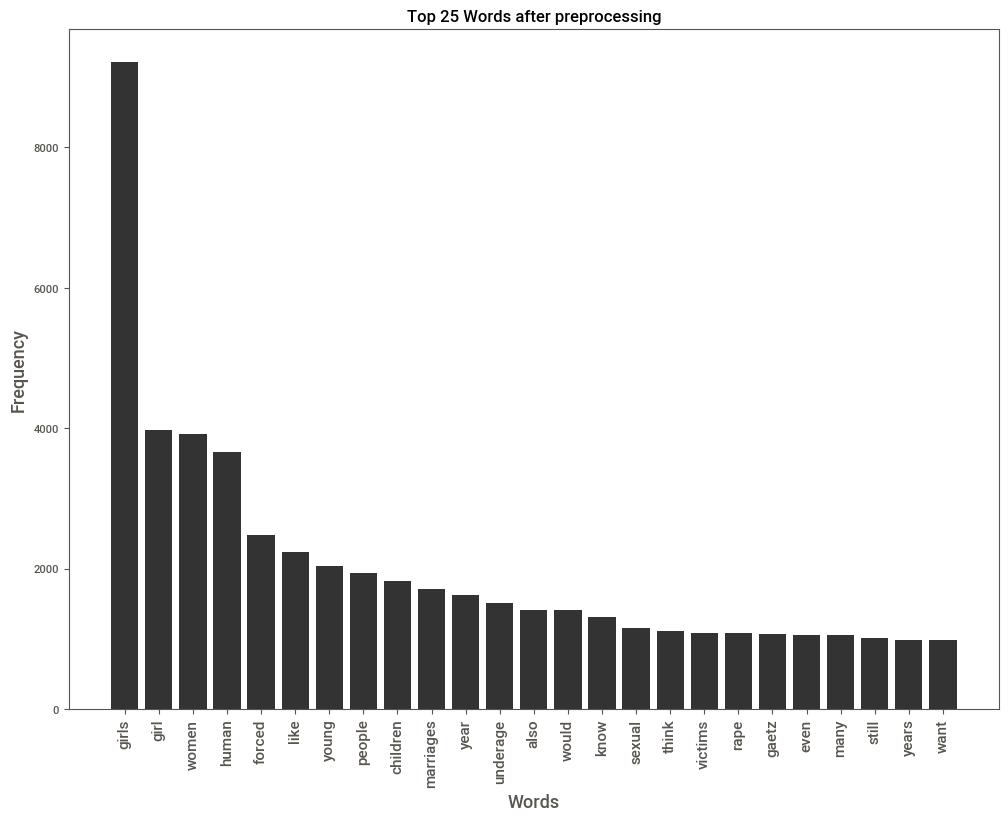

In [59]:
label = word_df['word'].head(25)
freq = word_df['freq'].head(25)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()


In [60]:
df.to_pickle('pre-processed.gbv')

# Emoji Processing

### Fetch emoji from tweets

In [61]:
# Install emojis
!pip install emojis

In [65]:
tweets = df['tweet']
tweets.head(50)

0     Join the Fight against Forced Child Marriage  ...
1     @RealCandaceO Work on your marriage!  Every da...
2     @sheilagregoire “Disruptive” child. Everything...
3     @cuppymusic Make una no dey whine my nipples. ...
4     @CNN That's fine if the company so chooses, bu...
5     Valentine/Noun/ˈva-lən-ˌtīn 1: A person who st...
6     Join the Fight against Forced Child Marriage  ...
7     @DeborahProudJew Free North Korea! End FGM in ...
8     Girls Not Brides | FACT: We won’t achieve gend...
9     This is one-sided. The Western “sex is like fo...
10     https://t.co/kinmWTH6j9 1. To awnser your que...
11    @RawBeautyKristi I have two half siblings from...
12    Happy valentines day!  1. Historical instituti...
13    Took my parents to longhorn for VDay since the...
14    @Utopiana Your take is a bit anachronistic con...
15    Unchained At Last | Here are some passionate m...
16    The hardest way out for me is marriage. That m...
17    Detailing such real-world experiences as c

In [66]:
import itertools
import emojis

emojis_list=[]

for tweet in tweets:
  emoji_present = list(emojis.get(tweet))
  if emoji_present:
    emojis_list.append(emoji_present)
    # One-Liner to union a list of sets
    emojis_list = list(itertools.chain.from_iterable(emojis_list))

In [68]:
emojis_updated_list = [x for x in emojis_list if x !='️']
print(emojis_updated_list)

['😂', '✊', '🌎', '🙏', '🇺', '🇲', '😷', '✊', '🤣', '😂', '😁', '🤔', '🥴', '🙃', '📚', '🎤', '🥰', '⚖', '🤣', '😂', '🥵', '😏', '🙄', '🤣', '😎', '😅', '🙅', '🏆', '🕺', '♀', '💜', '♥', '😍', '🚨', '🇺', '🇸', '💙', '💪', '💔', '😭', '😂', '💔', '👶', '😇', '🤔', '🌎', '👶', '🇳', '🇬', '♀', '🤦', '🙄', '🤷', '\u200d', '♀', '💖', '🚩', '🤣', '😥', '♀', '🤦', '😂', '🤣', '😂', '😏', '⁉', '📝', '🎮', '❗', '🤔', '🤮', '🤦', '♂', '😠', '🤷', '♂', '📷', '🤷', '♀', '😭', '😂', '😂', '😅', '🚺', '🙄', '😔', '😂', '🧡', '😂', '🥴', '🤷', '♂', '😤', '😖', '😡', '🤬', '🙃', '🤡', '♀', '🤦', '👇', '♀', '🤦', '👀', '🤯', '✅', '❌', '🔥', '😌', '😔', '😒', '🤣', '🙄', '😒', '❤', '❤', '💫', '📌', '🇱', '🇷', '😩', '😂', '😱', '🙆', '🤔', '🔗', '👎', '😭', '💁', '\u200d', '♂', '🤣', '😅', '♀', '🤦', '🇵', '🇰', '🙏', '🙄', '😂', '♀', '🤦', '❌', '🙂', '🤷', '\u200d', '♀', '💥', '☀', '🌍', '🌏', '👶', '🏃', '▪', '😭', '😂', '😏', '😂', '🤣', '😂', '😳', '😂', '▪', '😌', '❣', '😂', '😂', '🖤', '📸', '😏', '😱', '💪', '🙌', '🙏', '🥵', '🔹', '👇', '😢', '🙏', '👍', '🤷', '😲', '🙄', '🎯', '📌', '🤩', '🎯', '😔', '➡', '\U0001f972', '😅', '💀', '🎯', '🤪', '🎯', 

In [ ]:
from collections import Counter
Counter(emojis_updated_list).most_common()

[('😂', 223),
 ('😭', 122),
 ('🙄', 109),
 ('♀', 109),
 ('🤔', 101),
 ('🤷', 91),
 ('🙏', 90),
 ('🤣', 87),
 ('🤦', 71),
 ('\u200d', 64),
 ('😡', 63),
 ('👇', 59),
 ('♂', 58),
 ('❤', 51),
 ('💔', 44),
 ('🥴', 40),
 ('🤮', 39),
 ('😩', 39),
 ('👏', 39),
 ('🥺', 38),
 ('🇺', 35),
 ('😢', 35),
 ('😔', 32),
 ('💀', 31),
 ('👉', 31),
 ('🇸', 30),
 ('😳', 30),
 ('😒', 27),
 ('🤬', 26),
 ('✅', 24),
 ('🇪', 24),
 ('👍', 23),
 ('🙃', 22),
 ('👧', 22),
 ('🇳', 21),
 ('🇬', 21),
 ('🤡', 21),
 ('🤢', 21),
 ('😅', 20),
 ('👀', 20),
 ('😐', 20),
 ('😬', 20),
 ('😏', 19),
 ('❌', 19),
 ('😉', 19),
 ('✨', 19),
 ('🔥', 18),
 ('🇦', 18),
 ('😱', 17),
 ('😊', 17),
 ('🤨', 17),
 ('😁', 16),
 ('📸', 16),
 ('😍', 15),
 ('➡', 15),
 ('💕', 15),
 ('🥰', 14),
 ('💜', 14),
 ('🙌', 14),
 ('🇱', 13),
 ('💯', 13),
 ('🇮', 13),
 ('😥', 12),
 ('😠', 12),
 ('📌', 12),
 ('🙂', 12),
 ('⬇', 12),
 ('💩', 12),
 ('🌎', 11),
 ('😖', 11),
 ('👩', 11),
 ('✊', 10),
 ('💙', 10),
 ('👶', 10),
 ('🤯', 10),
 ('🇷', 10),
 ('😕', 10),
 ('‼', 10),
 ('💰', 10),
 ('🇧', 10),
 ('😎', 9),
 ('🙅', 9),
 ('🚨', 9

In [ ]:
!pip install git+https://github.com/nexxt-intelligence/DeepMoji@tf-keras
!pip install wordcloud matplotlib

  Cloning https://github.com/nexxt-intelligence/DeepMoji (to revision tf-keras) to /tmp/pip-req-build-ok1yieq3
  Running command git clone -q https://github.com/nexxt-intelligence/DeepMoji /tmp/pip-req-build-ok1yieq3
  Running command git checkout -b tf-keras --track origin/tf-keras
  Switched to a new branch 'tf-keras'
  Branch 'tf-keras' set up to track remote branch 'tf-keras' from 'origin'.
  Created wheel for deepmoji: filename=deepmoji-1.1-cp37-none-any.whl size=365736474 sha256=6ba7dafab43b1b7967717ac062ccc7a3ac55c3a46361d49a324507274186972e
  Stored in directory: /tmp/pip-ephem-wheel-cache-oscbqzdu/wheels/59/24/cb/d380c5b5be45e491b02395908a02fda52712ded2b90d2ef405
Successfully built deepmoji


### Emoji word cloud

In [ ]:
import string
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

class EmojiCloud:
    def __init__(self,
                 font_path='Symbola.ttf',
                 color='yellow'):
        self.font_path = font_path
        self.color = color
        self.word_cloud = self.initialize_wordcloud()
        self.emoji_probability = None

    def initialize_wordcloud(self):
        word_cloud = WordCloud(font_path=self.font_path,
                               width=2000,
                               height=1000,
                               background_color='white',
                               random_state=42,
                               collocations=False)
        return word_cloud

    def color_func(self, word, font_size, position, orientation, random_state=None,
                   **kwargs):
        hue_saturation = {
            'yellow': '42, 88%',
            'blue': '194, 49%',
            'green': '159, 42%',
            'grey': '45, 2%'
        }.get(self.color)

        current_emoji_probability = self.emoji_probability[word]
        # Use 50% opacity for emojis with 20% or more coverage
        if current_emoji_probability >= 0.20:
            opacity = 50
        else:
            # Use an opacity between 60 to 65 for other emojis
            opacity = 65 - current_emoji_probability/0.2 * 5
        return f"hsl({hue_saturation},{opacity}%)"

    def generate(self, emojis):
        emoji_frequencies = Counter(emojis)
        total_count = len(emojis)
        
        # Calculate probabilities of emojis from frequency counts
        self.emoji_probability = {emoji: count/total_count for emoji, count in emoji_frequencies.items()}
        
        # Use wordcloud library to generate a wordcloud of emojis
        wc = self.word_cloud.generate_from_frequencies(emoji_frequencies)
        
        # Recolor emojis according to their frequency
        plt.imshow(wc.recolor(color_func=self.color_func, random_state=42),
                   interpolation="bilinear")
        plt.axis("off")

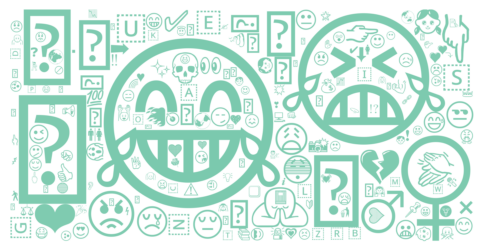

In [ ]:
emoji_cloud = EmojiCloud(font_path='./Symbola.ttf', color='green')
emoji_cloud.generate(emojis_updated_list)

#Topic Modeling

What is topic modeling?
Topic modeling is a method for unsupervised classification of documents, similar to clustering on numeric data, which finds some natural groups of items (topics) even when we’re not sure what we’re looking for.

It can help with the following:

1. discovering the hidden themes in the collection.
2.   classifying the documents into the discovered themes.
3.  using the classification to organize/summarize/search the documents.





In [ ]:
!pip install pyLDAvis

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import collections
import spacy
from pprint import pprint
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet
# NLTK
from nltk import bigrams
from nltk.stem import PorterStemmer
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [ ]:
df = pd.read_pickle('pre-processed.gbv')
df.head()

,date,time,username,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,reply_to,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined
0,2021-02-14,23:59:20,mikecoulson48,Join the Fight against Forced Child Marriage ...,en,[],['https://www.freedomunited.org/advocate/stand...,[],0.0,8.0,1.0,[],https://twitter.com/mikecoulson48/status/13611...,[],join fight against forced child marriage,"[join, fight, against, forced, child, marriage]","[join, fight, forced]",join fight forced
1,2021-02-14,23:56:57,bretto1997,@RealCandaceO Work on your marriage! Every da...,en,[],[],[],0.0,0.0,1.0,[],https://twitter.com/bretto1997/status/13611021...,"[{'screen_name': 'RealCandaceO', 'name': 'Cand...",work your marriage every always going well lov...,"[work, your, marriage, every, always, going, w...","[work, every, always, going, well, love, beaut...",work every always going well love beautiful li...
2,2021-02-14,23:52:27,rachedennis,@sheilagregoire “Disruptive” child. Everything...,en,[],[],[],0.0,0.0,0.0,[],https://twitter.com/rachedennis/status/1361101...,"[{'screen_name': 'sheilagregoire', 'name': 'Sh...",disruptive child everything crazy school churc...,"[disruptive, child, everything, crazy, school,...","[disruptive, everything, crazy, school, church...",disruptive everything crazy school church turn...
3,2021-02-14,23:46:22,hommiesdrey,@cuppymusic Make una no dey whine my nipples. ...,en,[],[],[],0.0,0.0,1.0,[],https://twitter.com/HommiesDrey/status/1361099...,"[{'screen_name': 'cuppymusic', 'name': 'Cuppy'...",make whine nipples there absolutely nothing sw...,"[make, whine, nipples, there, absolutely, noth...","[make, whine, nipples, absolutely, nothing, sw...",make whine nipples absolutely nothing sweet ch...
4,2021-02-14,23:44:31,kathy65483441,"@CNN That's fine if the company so chooses, bu...",en,[],[],[],0.0,0.0,0.0,[],https://twitter.com/Kathy65483441/status/13610...,"[{'screen_name': 'CNN', 'name': 'CNN', 'id': '...",that fine company chooses shame grew with aunt...,"[that, fine, company, chooses, shame, grew, wi...","[fine, company, chooses, shame, grew, aunt, je...",fine company chooses shame grew aunt jemima pr...


In [ ]:
df.shape

(23966, 18)

Tokenize

In [ ]:

# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('join', 'fight'), ('fight', 'forced')]

In [ ]:

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])

In [ ]:
len(bigram_counts)

229271

In [ ]:
bigram_df.head(25)

,bigram,count
0,"(women, girls)",1199
1,"(underage, girls)",1119
2,"(young, girls)",1118
3,"(year, girl)",666
4,"(matt, gaetz)",540
5,"(little, girl)",314
6,"(little, girls)",300
7,"(girls, women)",284
8,"(forced, labor)",248
9,"(teenage, girls)",227


Number of Bigrams Identified 25


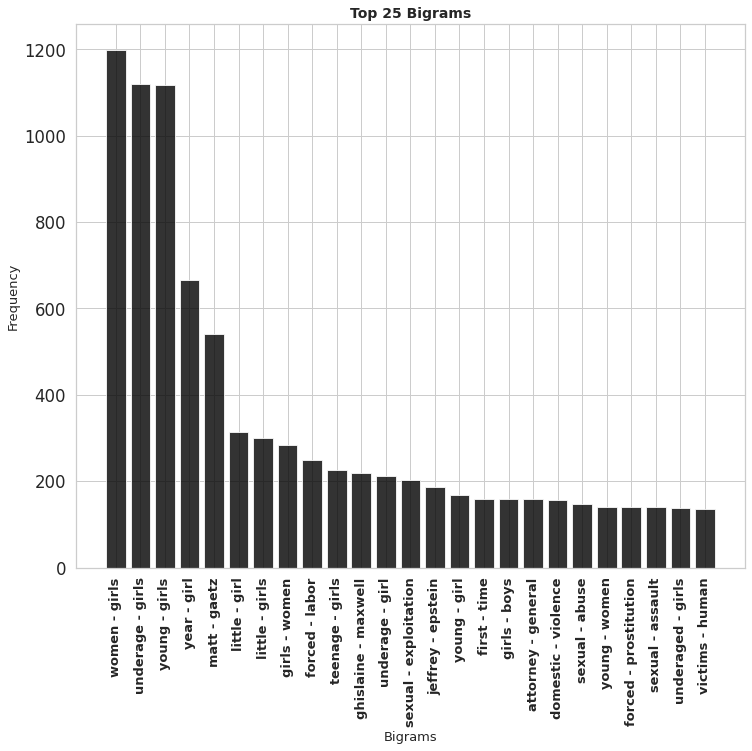

In [ ]:
bigram_label = ['women - girls','underage - girls', 'young - girls', 'year - girl','matt - gaetz', 'little - girl',
               'little - girls', 'girls - women', 'forced - labor', 'teenage - girls',
               'ghislaine - maxwell', 'underage - girl', 'sexual - exploitation', 'jeffrey - epstein', 'young - girl',
               'first - time', 'girls - boys', 'attorney - general', 'domestic - violence', 'sexual - abuse', 
               'young - women', 'forced - prostitution', 'sexual - assault','underaged - girls', 'victims - human']
bigram_freq = bigram_df['count'].head(25)
index = np.arange(len(bigram_freq))

print("Number of Bigrams Identified", len(bigram_df))
plt.figure(figsize=(12,10))
plt.bar(index, bigram_freq, alpha=0.8, color= 'black')
plt.xlabel('Bigrams', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, bigram_label, fontsize=13, rotation=90, fontweight="bold") 
plt.title('Top 25 Bigrams', fontsize=14, fontweight="bold")
plt.show()

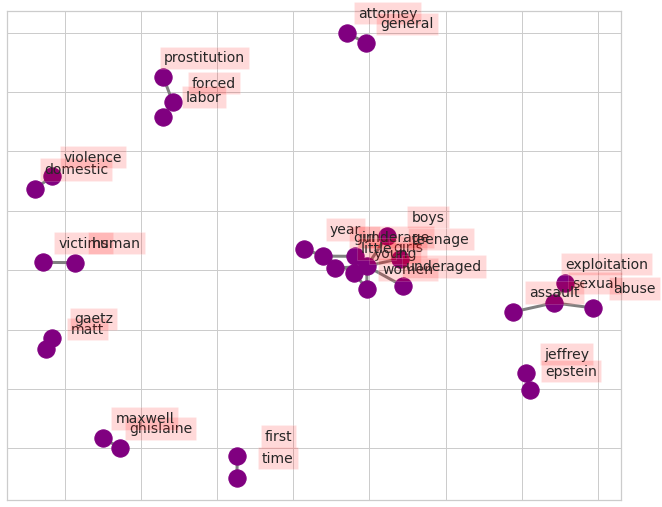

In [ ]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

In [ ]:
data = df.no_stop_joined.values.tolist()

In [ ]:
print(data[:1])

['join fight forced']


Tokenize

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(data))

print(data_words[:1])

[['join', 'fight', 'forced']]


In [ ]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['valentine', 'noun', 'person', 'stays', 'multiple', 'affairs', 'proven', 'someone', 'turns_blind', 'molestation', 'epstein', 'island', 'flight_logs', 'person', 'deletes', 'private', 'email', 'server', 'information', 'blink']


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)


Lemmatization

In [ ]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [ ]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = pd.Series(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))

In [ ]:
df

,date,time,username,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,link,reply_to,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,lemmatized
0,2021-02-14,23:59:20,mikecoulson48,Join the Fight against Forced Child Marriage ...,en,[],['https://www.freedomunited.org/advocate/stand...,[],0.0,8.0,1.0,[],https://twitter.com/mikecoulson48/status/13611...,[],join fight against forced child marriage,"[join, fight, against, forced, child, marriage]","[join, fight, forced]",join fight forced,[force]
1,2021-02-14,23:56:57,bretto1997,@RealCandaceO Work on your marriage! Every da...,en,[],[],[],0.0,0.0,1.0,[],https://twitter.com/bretto1997/status/13611021...,"[{'screen_name': 'RealCandaceO', 'name': 'Cand...",work your marriage every always going well lov...,"[work, your, marriage, every, always, going, w...","[work, every, always, going, well, love, beaut...",work every always going well love beautiful li...,"[work, always, go, well, love, beautiful, litt..."
2,2021-02-14,23:52:27,rachedennis,@sheilagregoire “Disruptive” child. Everything...,en,[],[],[],0.0,0.0,0.0,[],https://twitter.com/rachedennis/status/1361101...,"[{'screen_name': 'sheilagregoire', 'name': 'Sh...",disruptive child everything crazy school churc...,"[disruptive, child, everything, crazy, school,...","[disruptive, everything, crazy, school, church...",disruptive everything crazy school church turn...,"[disruptive, crazy, church, turn, never, talk,..."
3,2021-02-14,23:46:22,hommiesdrey,@cuppymusic Make una no dey whine my nipples. ...,en,[],[],[],0.0,0.0,1.0,[],https://twitter.com/HommiesDrey/status/1361099...,"[{'screen_name': 'cuppymusic', 'name': 'Cuppy'...",make whine nipples there absolutely nothing sw...,"[make, whine, nipples, there, absolutely, noth...","[make, whine, nipples, absolutely, nothing, sw...",make whine nipples absolutely nothing sweet ch...,"[make, whine, nipple, absolutely, sweet, chang..."
4,2021-02-14,23:44:31,kathy65483441,"@CNN That's fine if the company so chooses, bu...",en,[],[],[],0.0,0.0,0.0,[],https://twitter.com/Kathy65483441/status/13610...,"[{'screen_name': 'CNN', 'name': 'CNN', 'id': '...",that fine company chooses shame grew with aunt...,"[that, fine, company, chooses, shame, grew, wi...","[fine, company, chooses, shame, grew, aunt, je...",fine company chooses shame grew aunt jemima pr...,"[fine, company, choose, shame, grow, long, rea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23961,2021-02-10,02:18:14,bibekananda271,@UNGeneva China is responsible for Human Traff...,en,[],[],[],0.0,1.0,2.0,[],https://twitter.com/Bibekananda271/status/1359...,"[{'screen_name': 'UNGeneva', 'name': 'UN Genev...",china responsible human trafficking high deman...,"[china, responsible, human, trafficking, high,...","[china, responsible, human, high, demand, youn...",china responsible human high demand young wome...,"[human, high, demand, young, woman, policy, wa..."
23962,2021-02-10,02:05:00,kcrg,Two Eastern Iowa Airport employees are getting...,en,[],['https://www.kcrg.com/2021/02/10/eastern-iowa...,[],0.0,7.0,92.0,[],https://twitter.com/KCRG/status/13593224449731...,[],eastern iowa airport employees getting recogni...,"[eastern, iowa, airport, employees, getting, r...","[eastern, iowa, airport, employees, getting, r...",eastern iowa airport employees getting recogni...,"[employee, get, recognition, stop, young, girl..."
23963,2021-02-10,01:51:58,karenmcdonaldmi,"To every girl, every woman, every boy, or man ...",en,[],[],[],1.0,4.0,6.0,[],https://twitter.com/KarenMcDonaldMI/status/135...,[],every girl every woman every being abused expl...,"[every, girl, every, woman, every, being, abus...","[every, girl, every, woman, every, abused, exp...",every girl every woman every abused exploited ...,"[girl, woman, abused, exploit, help, incarcera..."
23964,2021-02-10,01:42:02,mrangelbabygod,@SenBillCassidy HMM🤔 SEX TRAFFICKING LITTLE GI...,en,[],['https://www.thescottishsun.co